# Data Visualization and Pre-processing

### Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Loading the dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Performing Univariate Analysis

##### Using distplot

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

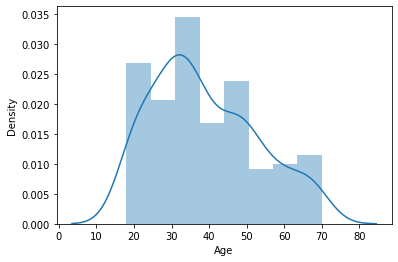

In [4]:
sb.distplot(df.Age)

##### Using pie chart

<AxesSubplot:ylabel='Gender'>

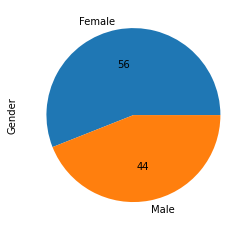

In [5]:
df['Gender'].value_counts().plot(kind='pie', autopct='%.0f')

### Performing Bivariate Analysis

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

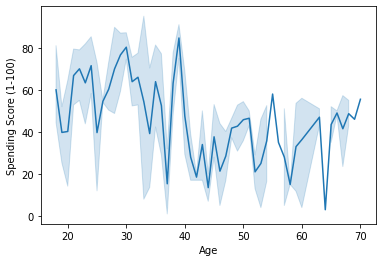

In [6]:
sb.lineplot(df.Age, df['Spending Score (1-100)'])

### Performing Multi-variate Analysis

##### Using countplot

<AxesSubplot:xlabel='Age', ylabel='count'>

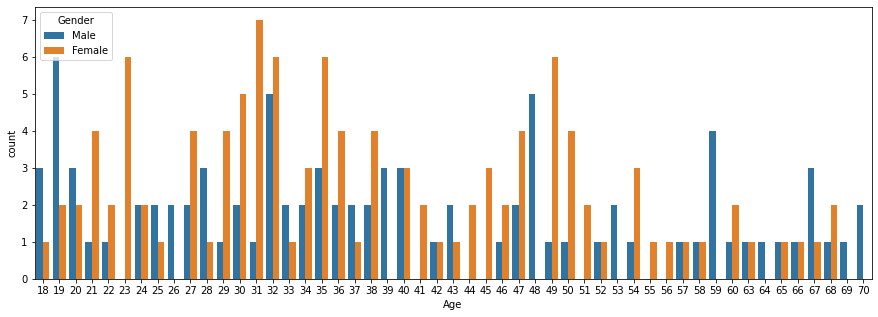

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
sb.countplot(data=df[['Age', 'Gender']], x='Age', hue='Gender')

##### Using pairplot

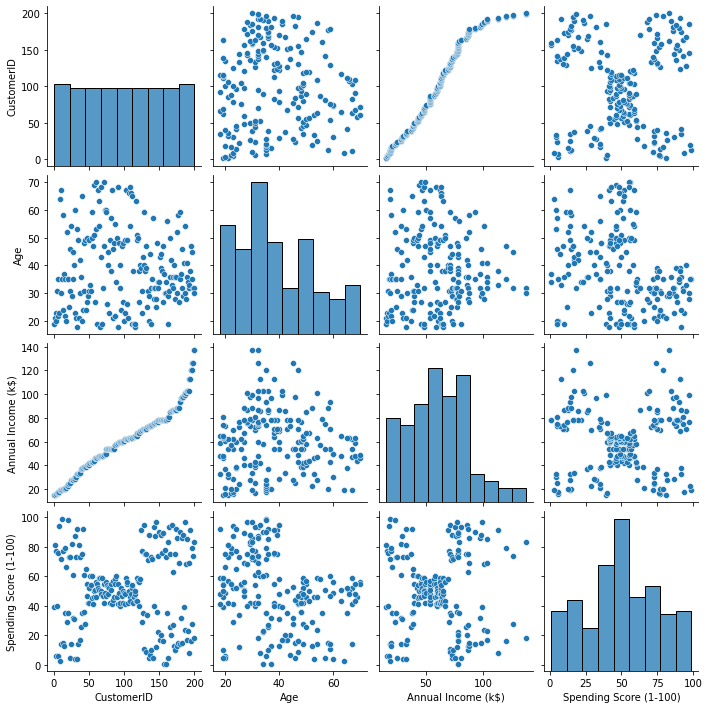

In [8]:
sb.pairplot(df)

##### Using heatmap

<AxesSubplot:>

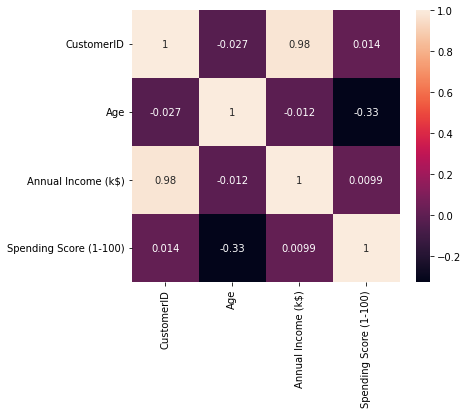

In [9]:
fig, ax = plt.subplots(figsize=(6,5))
sb.heatmap(df.corr(), annot=True, ax=ax)

##### Using lineplot

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

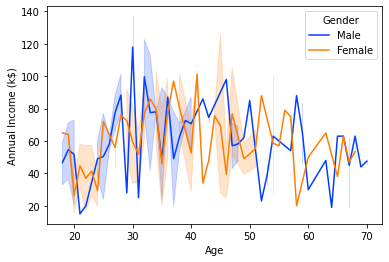

In [10]:
sb.lineplot( x='Age', y='Annual Income (k$)', data=df, palette='bright', hue='Gender')

### Performing Descriptive Statistics on the Dataset

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Handling Missing Values

In [12]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

#### There are no missing values in the dataset. So no replacement or filling in is needed

### Finding Outliers and Replacing the Outliers

##### Outlier Detection

In [13]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<AxesSubplot:>

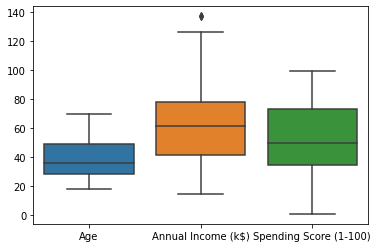

In [14]:
sb.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

There are outliers in the 'Annual Income (k$)' column. They have to be replaced.

##### Outliers Replacement in 'CreditScore' column

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

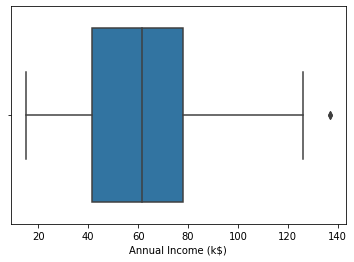

In [15]:
sb.boxplot(df['Annual Income (k$)'])

In [16]:
Q1_AnnualIncome = df['Annual Income (k$)'].quantile(0.25)
Q3_AnnualIncome = df['Annual Income (k$)'].quantile(0.75)
IQR_AnnualIncome = Q3_AnnualIncome - Q1_AnnualIncome
lower_limit_AnnualIncome = Q1_AnnualIncome - 1.5*IQR_AnnualIncome
upper_limit_AnnualIncome = Q3_AnnualIncome + 1.5*IQR_AnnualIncome

In [17]:
median = df['Annual Income (k$)'].median()

In [18]:
df['Annual Income (k$)'] = np.where(df['Annual Income (k$)'] > upper_limit_AnnualIncome, median, df['Annual Income (k$)'])

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

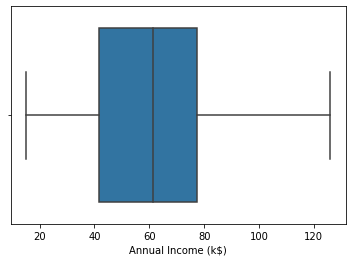

In [19]:
sb.boxplot(df['Annual Income (k$)'])

In [20]:
df.shape

(200, 5)

### Encoding

##### Label Encoding

In [21]:
le = LabelEncoder()

In [22]:
df.Gender = le.fit_transform(df.Gender)

In [23]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


### Scaling

In [24]:
df_scaled = pd.DataFrame(scale(df.drop(columns=['CustomerID', 'Gender'])), columns=df.drop(columns=['CustomerID', 'Gender']).columns)
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.788777,-0.434801
1,-1.281035,-1.788777,1.195704
2,-1.352802,-1.748853,-1.715913
3,-1.137502,-1.748853,1.040418
4,-0.563369,-1.708930,-0.395980


In [25]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = df_scaled[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.424569,-1.788777,-0.434801
1,2,1,-1.281035,-1.788777,1.195704
2,3,0,-1.352802,-1.748853,-1.715913
3,4,0,-1.137502,-1.748853,1.040418
4,5,0,-0.563369,-1.708930,-0.395980


### Performing KMeans Clustering Algorithm

In [26]:
from sklearn.cluster import KMeans
km = KMeans()
cluster_data = km.fit_predict(df.drop(columns=['CustomerID']))
cluster_data

array([2, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 5, 2, 6, 3,
       6, 2, 1, 3, 3, 3, 1, 3, 3, 5, 1, 1, 1, 5, 3, 5, 5, 3, 5, 1, 5, 3,
       1, 5, 3, 3, 5, 1, 5, 5, 5, 3, 1, 1, 3, 1, 5, 1, 5, 1, 3, 1, 1, 3,
       3, 1, 5, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 5, 3, 1, 3, 5, 5, 5, 5,
       5, 3, 1, 3, 3, 3, 5, 1, 1, 1, 3, 1, 1, 4, 3, 4, 7, 4, 7, 4, 7, 4,
       3, 4, 0, 4, 7, 4, 0, 4, 7, 4, 3, 4, 0, 4, 7, 4, 0, 4, 7, 4, 7, 4,
       7, 4, 0, 4, 0, 4, 7, 4, 0, 4, 7, 4, 7, 4, 7, 4, 7, 4, 0, 4, 7, 4,
       7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 0, 4, 7, 4, 7, 4,
       0, 4])

### Adding the cluster data to the primary dataset

In [27]:
df['Cluster Data'] = pd.Series(cluster_data)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Data
0,1,1,-1.424569,-1.788777,-0.434801,2
1,2,1,-1.281035,-1.788777,1.195704,2
2,3,0,-1.352802,-1.748853,-1.715913,6
3,4,0,-1.137502,-1.748853,1.040418,2
4,5,0,-0.563369,-1.708930,-0.395980,6


### Splitting the data into Dependent and Independent Variables

In [28]:
# Independent Variable: X

X = df.drop(columns=['CustomerID', 'Cluster Data'], axis=1)
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.788777,-0.434801
1,1,-1.281035,-1.788777,1.195704
2,0,-1.352802,-1.748853,-1.715913
3,0,-1.137502,-1.748853,1.040418
4,0,-0.563369,-1.708930,-0.395980


In [29]:
# Dependent Variable (Target): Y

Y = df[['Cluster Data']]
Y.head()

,Cluster Data
0,2
1,2
2,6
3,2
4,6


### Splitting the Data into Training and Testing Data

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [31]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((140, 4), (60, 4), (140, 1), (60, 1))

In [32]:
X_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0,1.733166,0.207403,-0.279515
67,0,2.091999,-0.471298,-0.085407
78,0,-1.137502,-0.231756,0.069879
42,1,0.656665,-0.830610,-0.551266
17,1,-1.352802,-1.549235,0.613381


In [33]:
X_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0,-0.850435,-0.551145,0.031057
40,0,1.876699,-0.870534,-0.590088
34,0,0.728432,-1.070152,-1.405340
102,1,2.020232,0.087632,0.341630
184,0,0.154298,1.564805,-0.434801


In [34]:
Y_train.head()

,Cluster Data
116,5
67,5
78,3
42,6
17,2


In [35]:
Y_test.head()

,Cluster Data
58,3
40,5
34,6
102,5
184,7


### Building the Model

In [36]:
from sklearn.svm import SVC
svc = SVC()

### Training the Model

In [37]:
svc.fit(X_train, Y_train)

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

### Testing the Model

In [38]:
Y_pred_train = svc.predict(X_train)
Y_pred_train

array([5, 5, 3, 1, 2, 2, 4, 3, 3, 1, 1, 3, 4, 0, 7, 3, 6, 1, 1, 3, 7, 5,
       1, 1, 4, 2, 5, 3, 4, 3, 3, 6, 4, 7, 4, 3, 4, 4, 7, 4, 3, 2, 3, 7,
       6, 5, 1, 7, 6, 1, 2, 4, 1, 3, 1, 4, 3, 7, 1, 5, 5, 1, 4, 7, 4, 3,
       7, 4, 7, 6, 6, 1, 7, 3, 4, 2, 7, 2, 7, 1, 4, 4, 3, 7, 5, 2, 2, 4,
       5, 5, 3, 6, 1, 3, 6, 2, 4, 3, 4, 4, 7, 6, 1, 3, 4, 6, 5, 7, 2, 5,
       6, 3, 1, 2, 7, 4, 1, 1, 3, 1, 3, 4, 0, 4, 7, 1, 6, 7, 2, 0, 1, 4,
       0, 0, 1, 4, 4, 5, 7, 2])

In [39]:
Y_pred_test = svc.predict(X_test)
Y_pred_test

array([3, 5, 6, 5, 7, 0, 3, 6, 2, 7, 4, 6, 2, 1, 5, 1, 4, 2, 7, 1, 3, 6,
       6, 3, 2, 0, 6, 6, 4, 2, 3, 4, 7, 4, 7, 3, 7, 5, 3, 7, 5, 1, 4, 6,
       1, 2, 3, 2, 4, 3, 1, 4, 1, 5, 2, 4, 4, 5, 4, 0])

### Measuring the performance using Evaluation Metrics

##### Accuracy score for training data

In [40]:
accuracy_score(Y_train, Y_pred_train)

0.9785714285714285

##### Accuracy score for testing data

In [41]:
accuracy_score(Y_test, Y_pred_test)

0.95

##### Classification Report

In [42]:
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        11
           5       1.00      0.78      0.88         9
           6       1.00      1.00      1.00         8
           7       0.86      1.00      0.92         6

    accuracy                           0.95        60
   macro avg       0.95      0.94      0.94        60
weighted avg       0.96      0.95      0.95        60



##### Confusion Matrix

In [43]:
confusion_matrix(Y_test, Y_pred_test)

array([[ 3,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  5,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  6]], dtype=int64)

<div style="text-align:right;">Submitted by <br>
<b> Blessy Karunya J </b><br>
<b> (Roll No.: 917719C012) </b></div>